In [53]:
# class Node:
#   def __init__(self, data) -> None:
#     self.data = data
#     self.neighbors = []
#     self.visited = False

#   def add_neighbor(self, child):
#     self.neighbors.append(child)

#   def __repr__(self) -> str:
#     return str(self.data)
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
  def __init__(self) -> None:
    self.graph = {}
  
  def add_edge(self, start, end):
    if start not in self.graph:
      self.graph[start] = []
    self.graph[start].append(end)
    
  def __repr__(self) -> str:
    result = ""
    for node in self.graph:
      result += f"Node {node} -> {self.graph[node]}\n"      
    return result
  
  def bfs(self, start):
    print("BFS: ", end="")
    queue = [start]
    visited = set(queue)
    while queue:
      node = queue.pop(0)
      for neighbor in self.graph.get(node, []):
        if neighbor not in visited:
          queue.append(neighbor)
          visited.add(neighbor)
      # print("Queue: ", queue, "Visited: ", visited, "Node: ", node)
      print(node, end=" ")
    print()
  
  def dfs_stack(self, start):
    print("DFS using stack: ", end="")
    stack = [start]
    visited = set(stack)
    while stack:
      node = stack.pop()
      for neighbor in self.graph.get(node, []):
        if neighbor not in visited:
          stack.append(neighbor)
          visited.add(neighbor)
      # print("Stack: ", stack, "Visited: ", visited, "Node: ", node)
      print(node, end=" ")
    print()
    
  def dfs_recursive(self, start, visited=None):
    if visited is None:
      print("DFS using recursion: ", end="")
      visited = set()
    visited.add(start)
    print(start, end=" ")
    for neighbor in self.graph.get(start, []):
      if neighbor not in visited:
        self.dfs_recursive(neighbor, visited)
        
  def draw(self, start=None):
    G = nx.DiGraph()
    for node in self.graph:
      G.add_node(node)
      for neighbor in self.graph[node]:
        G.add_edge(node, neighbor)
    if start is None:
      nx.draw(G, with_labels=True)
    else:
      pos = nx.spring_layout(G)
      nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue")
      nx.draw_networkx_nodes(G, pos, nodelist=[start], node_color="r", node_size=1000)
    plt.show()

In [54]:
graph = Graph()
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 2)
graph.add_edge(1, 4)
graph.add_edge(1, 5)
graph.add_edge(2, 0)
graph.add_edge(2, 3)
# graph.add_edge(2, 6)
# graph.add_edge(3, 2)
graph.add_edge(3, 3)
graph.add_edge(3, 4)
graph.add_edge(4, 5)

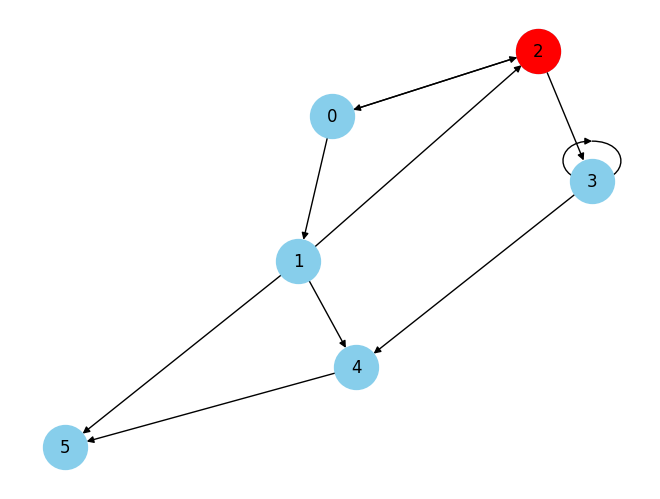

BFS: 2 0 3 1 4 5 
DFS using stack: 2 3 4 5 0 1 
DFS using recursion: 2 0 1 4 5 3 

In [58]:
graph.draw(2)
graph.bfs(2)
graph.dfs_stack(2)
graph.dfs_recursive(2)

[0, 2, 6]


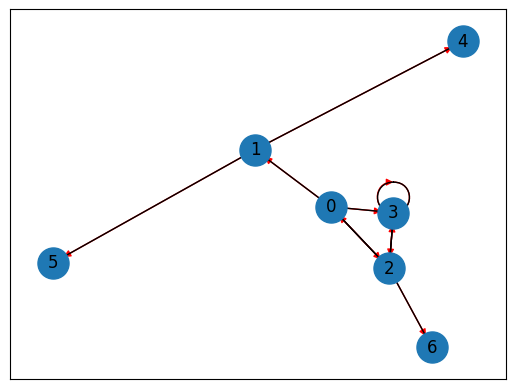

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_nodes_from(range(7))
G.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 0), (2, 3), (2, 6), (3, 2), (3, 3)])
print(nx.shortest_path(G, 0, 6))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, arrows=False)
plt.show()